# *Modelo de Bose-Hubbard con interacción de rango infinito*

$$
\rho = \rho(\beta,\mu) = \frac{\sum_{n=1}^\infty = ne^{\beta[(\mu+\lambda-1)n-\lambda n^{2}]}}{\sum_{n=0}^\infty = e^{\beta[(\mu+\lambda-1)n-\lambda n^{2}]}}
$$

### Parametros

__β__ : Temeperatura inversa.

__λ__ : Constante asociada al término no lineal $\hat{n}^2$ del operador de energía positiva.

__µ__ : Potencial químico.

__N__ : Número de partículas en el sistema. 

### Condiciones

$0 < β,λ$

µ : Sin restricciones.

## *Desarrollo*

### Dependencias

In [168]:
import math
import matplotlib.pyplot as plt
import time

### Valores de *µ*

$$
 \rho(\beta,\mu) = \left\{
       \begin{array}{ll}
     0      & \mathrm{si\ \quad} \mu < 1 \\
     K & \mathrm{si\ \quad} 2(K - 1) \Lambda +1 < \mu < 2K \Lambda +1 \\
       \end{array}
     \right.
$$

In [169]:
def rangoK(k, lam):
    """Funcion del pimpa"""
    limInf = 2*(k-1)*lam+1
    limSup = 2*k*lam+1
    return (limInf, limSup)

\begin{equation}
f_{1} = \sum_{n=1}^\infty = ne^{\beta[(\mu+\Lambda-1)n-\Lambda n^{2}]}
\end{equation}

In [170]:
def f1(b, u, lam, N):
    sumatoria = 0
    for n in range(1, N):
        sumatoria += n*math.exp(b*((u+lam-1)*n-lam*math.pow(n, 2)))
    return sumatoria

\begin{equation}
f_{2} = \sum_{n=0}^\infty = e^{\beta[(\mu+\Lambda-1)n-\Lambda n^{2}]}
\end{equation}

In [171]:
def f2(b, u, lam, N):
    sumatoria = 0.0
    for n in range(N):
        resul = math.exp(b*((u+lam-1)*n-lam*math.pow(n, 2)))
        sumatoria += resul
    return sumatoria

### Parámetros formula

In [172]:
B = 2  # Temperatura inversa
U = 0.5
lam = 3
N = 10
K = 0.3  # Entero positivo

### Obtención de *ρ* y *µ*

$$
\rho_{0} = \frac{f_{1}}{f_{2}}
$$

In [186]:
class FuncionRo(object):
    def __init__(self):
        self.densidad_punto = 100.0
        self.rango_eje_x = [-10, 15]
        self.u = []  #ejex
        self.ro = [] #ejey
        self.b = B # inversa de la temperatura
        self.n = N
        self.lam = lam

    def funcionRo(self):
        densidad_puntos = self.densidad_punto
        rango_de_U = self.rango_eje_x
        x = self.u = []
        y = self.ro = []
        u = rango_de_U[0]

        for i in range(int(densidad_puntos)):
            u += (rango_de_U[1] - rango_de_U[0]) / densidad_puntos
            try:
                ro = f1(self.b, u, self.lam, self.n) / f2(self.b, u, self.lam, self.n)
                x.append(u)
                y.append(ro)
            except ZeroDivisionError:
                print('Division por cero')
                break
            except OverflowError:
                print('overflow')
                break
        return x, y
x, y = FuncionRo().funcionRo()        

### Obtención verificador 

$$
\frac{\mu + \lambda - 1}{2 \lambda} 
$$

In [174]:
def verificador (U, lam):
    resultado = (U + lam -1)/2*lam
    return resultado

### Graficador

In [175]:
class Grafica():
    def __init__(self):
        self.x = []
        self.listaY=[]

        self.limInfx = 0
        self.limSupx = 0
        self.limInfy = 0
        self.limSupy = 0

        self.fig, self.ax = plt.subplots()

    def funcionX(self, func):
        self.x = func

    def agregarFuncionY(self, funcion, color, figura, label):
        funcion.funcionRo()
        y = funcion.ro
        self.listaY.append([funcion, color, figura, label])
        if len(self.listaY) == 1:
            self.limInfx = min(self.x) - 1
            self.limSupx = max(self.x) + 1
            self.limInfy = min(y) - 1
            self.limSupy = max(y) + 1
        else:
            if min(y) -1 < self.limInfy:
                self.limInfy = min(y) -1

            if max(y) +1 > self.limSupx:
                self.limInfy = max(y) +1
                
    def mostrarGrafico(self):
        for y in self.listaY:
            x_, y_ = y[0].funcionRo()
            label = 'B: '+str(y[0].b)
            label+= ' lam: '+str(y[0].lam)
            self.ax.plot(self.x, y_, y[1]+y[2],linewidth = 2, label = label)
        plt.title('ρ vs μ')
        plt.ylabel('ρ')
        plt.xlabel('μ')
        legend = self.ax.legend(shadow=True)
        plt.show()
    

# Experimentacion

In [176]:
#Obtener la funcion con los siguientes parametros
funcionExperimental1 = FuncionRo()
#la dencidad de puntos tiene que ser decimal
funcionExperimental1.densidad_punto = 30.0
funcionExperimental1.rango_eje_x = [-10, 15]
funcionExperimental1.b = B # inversa de la temperatura
funcionExperimental1.n = N
funcionExperimental1.lam = 3
#funcionExperimental1.funcionRo()

In [177]:
B = 2  # Temperatura inversa
U = 0.5
lam = 3
N = 10
K = 0.3  # Entero positivo

x1, y1 = funcionExperimental1.funcionRo()#arreglos_B_XY(2, U, lam, N)
grafico = Grafica()
grafico.funcionX(x1)
grafico.agregarFuncionY(funcionExperimental1, 'r', '.', 2)
#grafico.mostrarGrafico()

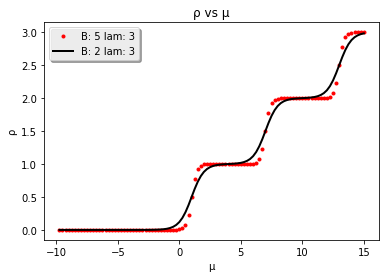

In [185]:
#cambiando la experimentacion con un B = 4
funcionExperimental1 = FuncionRo()
funcionExperimental1.b = 2
funcionExperimental2 = FuncionRo()
funcionExperimental1.b = 5

x1, y1 = funcionExperimental1.funcionRo()
grafico = Grafica()
grafico.funcionX(x1)
grafico.agregarFuncionY(funcionExperimental1, 'r', '.', 2)
grafico.agregarFuncionY(funcionExperimental2, 'k', '-', 2)
grafico.mostrarGrafico()

overflow


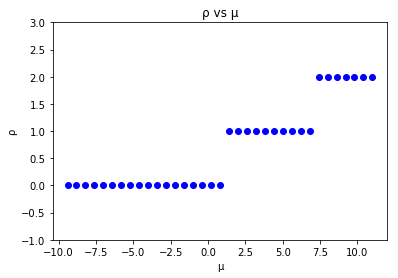

In [179]:

x1, y1 = arreglos_B_XY(50, U, lam, N)
grafica(x1, y1)

overflow


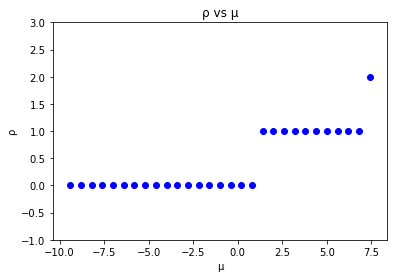

In [180]:
x1, y1 = arreglos_B_XY(100, U, lam, N)
grafica(x1, y1)

overflow


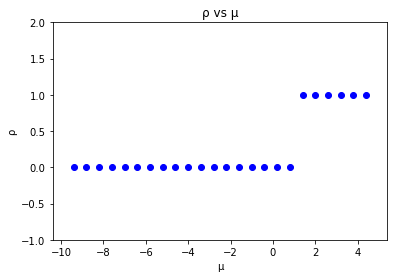

In [181]:
x1, y1 = arreglos_B_XY(200, U, lam, N)
grafica(x1, y1)

In [182]:
from IPython.display import HTML

import Problema1

HTML(Problema1.anim.to_html5_video())
#display_animation(Problema1.anim)